<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment5_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RAJIT_BASU_20MAI0019
# GitHub Link: 

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment5_20MAI0019.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
 # loading data
data = pd.read_csv("/content/drive/MyDrive/AABA_2006-01-01_to_2018-01-01.csv")       

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [6]:
Low_data = data.iloc[:,3:4].values

In [7]:
Low_data

array([[38.79],
       [40.77],
       [40.85],
       ...,
       [69.69],
       [69.51],
       [69.43]])

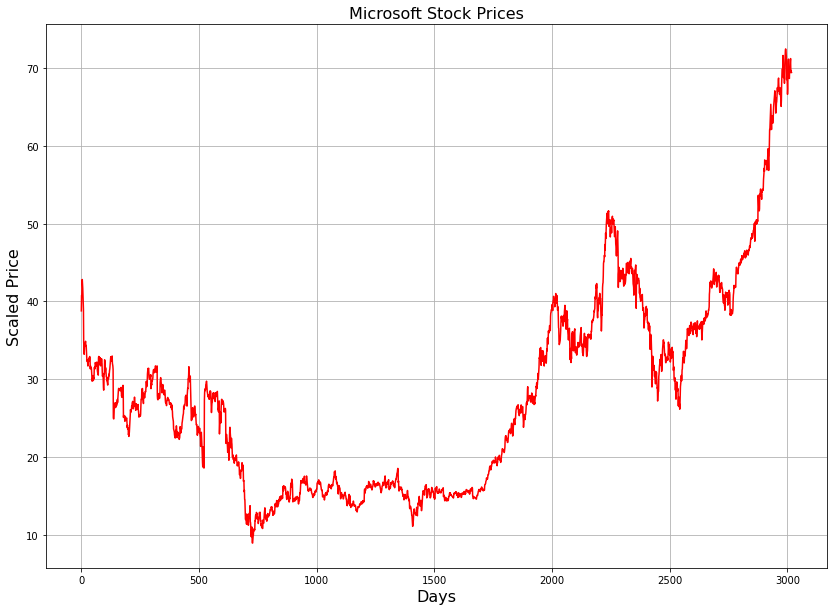

In [8]:
# Visualizing the data
plt.figure(figsize=(14,10))                 
plt.plot(Low_data,c="red")
plt.title("Microsoft Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

In [9]:
# Scaling the data between 1 and 0
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
Low_scaled = scaler.fit_transform(Low_data)

In [11]:
step_size = 21                      

train_x = []
train_y = []

In [12]:
for i in range(step_size,3019):               
    train_x.append(Low_scaled[i-step_size:i,0])
    train_y.append(Low_scaled[i,0])

In [13]:
train_x = np.array(train_x)                   
train_y = np.array(train_y)

In [14]:
print(train_x.shape)

(2998, 21)


In [15]:
# last 419 days are going to be used in test
# first 2500 days are going to be used in training
test_x = train_x[2500:]             
train_x = train_x[:2500]           
test_y = train_y[2500:]  
train_y = train_y[:2500]

In [16]:
train_x = np.reshape(train_x, (2500, step_size, 1))           
test_x = np.reshape(test_x, (498, step_size, 1))

In [17]:
print(train_x.shape)
print(test_x.shape)  

(2500, 21, 1)
(498, 21, 1)


### **RNN MODEL**

In [18]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

In [19]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 21, 40)            1680      
_________________________________________________________________
dropout (Dropout)            (None, 21, 40)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 21, 40)            3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 40)                3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4

In [20]:
rnn_model.compile(optimizer="adam",loss="MSE")

In [21]:
rnn_model.fit(train_x,train_y,epochs=10,batch_size=25)


Epoch 1/10
100/100 [==============================] - 7s 33ms/step - loss: 0.1221
Epoch 2/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0189
Epoch 3/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0105
Epoch 4/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0075
Epoch 5/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0054
Epoch 6/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0038
Epoch 7/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0030
Epoch 8/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0029
Epoch 9/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0023
Epoch 10/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0024


In [22]:
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

## **LSTM**

In [23]:
lstm_model = Sequential()
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 40)            6720      
_________________________________________________________________
dropout_3 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 40)            12960     
_________________________________________________________________
dropout_4 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [24]:
lstm_model.compile(optimizer="adam",loss="MSE")

In [25]:
lstm_model.fit(train_x,train_y,epochs=10,batch_size=25)

Epoch 1/10
100/100 [==============================] - 32s 19ms/step - loss: 0.0125
Epoch 2/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0014
Epoch 3/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0012
Epoch 4/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0012
Epoch 5/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0013
Epoch 6/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0010
Epoch 7/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0010
Epoch 8/10
100/100 [==============================] - 2s 19ms/step - loss: 8.6430e-04
Epoch 9/10
100/100 [==============================] - 2s 19ms/step - loss: 8.1349e-04
Epoch 10/10
100/100 [==============================] - 2s 19ms/step - loss: 8.1547e-04


In [26]:
lstm_predictions = lstm_model.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [27]:
print("R^2 Score of RNN",rnn_score)
print("R^2 Score of LSTM",lstm_score)

R^2 Score of RNN 0.9299103779259027
R^2 Score of LSTM 0.9752245519463908


In [28]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

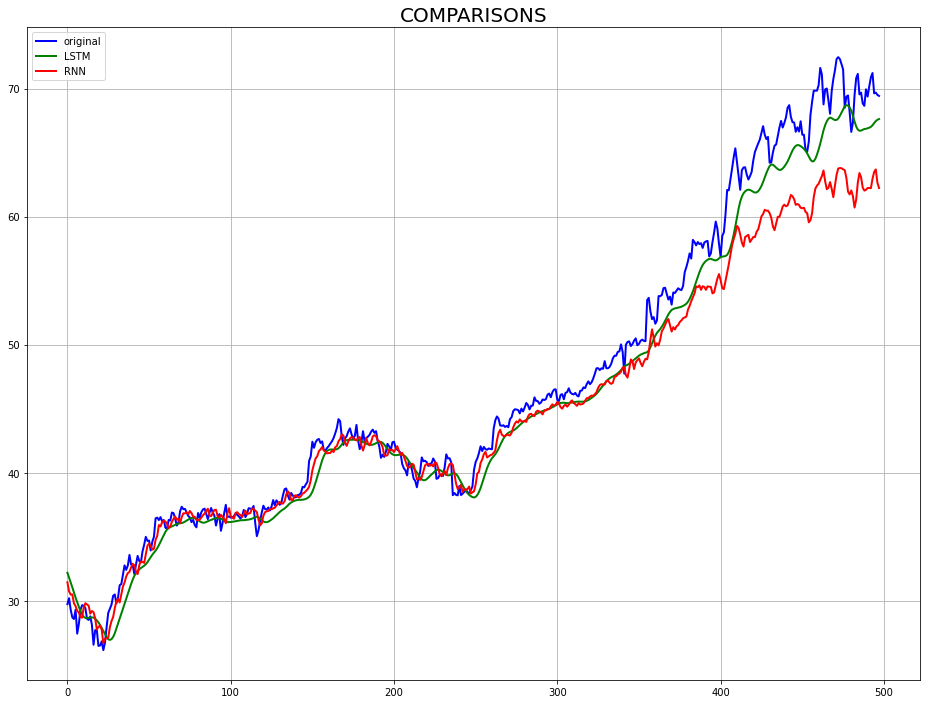

In [29]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("COMPARISONS",fontsize=20)
plt.grid()
plt.show()